<a href="https://colab.research.google.com/github/Tharunkumar1724/Customer-churn-prediction-using-ANN-model/blob/main/Telco_customer_churn_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


Mounted at /content/drive


**Teleco_customer_churn prediction using Ann Model**

**Import Necessary Library and Data Analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
path="/content/gdrive/My Drive/ Dataset/churn.csv"
df=pd.read_csv(path)
df1=pd.DataFrame(df)
df1.head()

Mounted at /content/gdrive


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
 df1.dtypes



,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


**Data Cleaning**

In [ ]:
 df1.drop('customerID',axis='columns',inplace=True)

In [ ]:
 df1.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df1.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [ ]:
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'],errors='coerce')

In [ ]:
df1['MonthlyCharges']=pd.to_numeric(df1['MonthlyCharges'],errors='coerce')

In [ ]:
x=df1[df1.Churn=='No'].tenure
y=df1[df1.Churn=='Yes'].tenure


<function matplotlib.pyplot.show(close=None, block=None)>

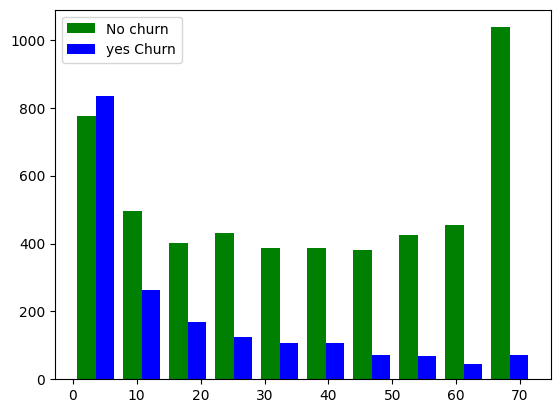

In [ ]:
import matplotlib.pyplot as plt
plt.hist([x,y],color=['green','blue'],label=['churnyes','churnno'])
plt.legend(['No churn','yes Churn'])
plt.show


**Data Preprocessing and Label Encoding**

<function matplotlib.pyplot.show(close=None, block=None)>

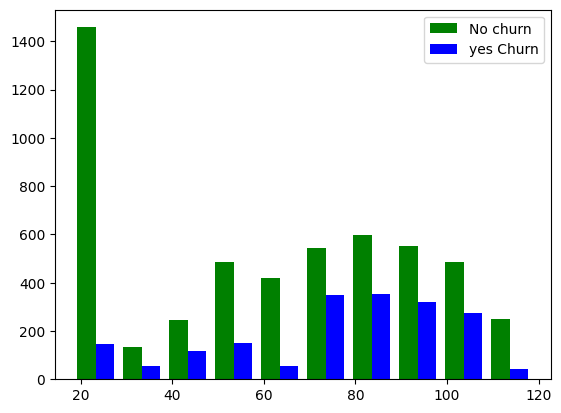

In [ ]:
x=df1[df1.Churn=='No'].MonthlyCharges
y=df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([x,y],color=['green','blue'],label=['churnyes','churnno'])
plt.legend(['No churn','yes Churn'])
plt.show


In [ ]:
def print_unique_val(df1):
  for col in df1:
    if df[col].dtypes=='object':
      print(f'{col}:{df[col].unique()}')

In [ ]:
print_unique_val(df1)


gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
print(df1)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0               No             DSL             No          Yes   
1              

In [ ]:
yes_no_columns=["Partner",
"Dependents",
"PhoneService",
"MultipleLines",
"OnlineSecurity",
"OnlineBackup",
"DeviceProtection",
"TechSupport",
"StreamingTV",
"StreamingMovies",
"PaperlessBilling",
"Churn"]
for col in yes_no_columns:
  df1[col].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-14-3287ea15e506>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-14-3287ea15e506>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [ ]:
for col in df1:
  print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-16-ba153b6b6960>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-16-ba153b6b6960>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [ ]:
df1.gender.unique()

array([1, 0])

In [ ]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype=int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(6)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
scaler=MinMaxScaler()
df2[col_to_scale]=scaler.fit_transform(df2[col_to_scale])
scaler = RobustScaler()
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [ ]:
df2.sample(7)
df2['TotalCharges']

,TotalCharges
0,-0.403038
1,0.145000
2,-0.379963
3,0.130633
4,-0.367144
...,...
7038,0.174764
7039,1.758008
7040,-0.309737
7041,-0.321480


In [ ]:
df2.abs()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.608696,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.108696,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.586957,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.347826,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.586957,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.108696,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,0.934783,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.391304,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.543478,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
for col in df2:
  print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[-0.60869565  0.10869565 -0.58695652  0.34782609 -0.45652174 -0.15217391
 -0.41304348 -0.02173913  0.7173913  -0.34782609 -0.2826087   0.63043478
  0.43478261 -0.08695652  0.86956522  0.5         0.91304348 -0.17391304
 -0.36956522  0.02173913  0.39130435  0.93478261 -0.26086957 -0.04347826
 -0.52173913  0.36956522 -0.39130435  0.89130435  0.73913043  0.30434783
 -0.30434783  0.67391304 -0.23913043  0.80434783 -0.43478261 -0.56521739
  0.04347826  0.45652174  0.76086957  0.58695652 -0.47826087  0.2826087
  0.13043478  0.41304348  0.          0.7826087   0.19565217  0.84782609
  0.06521739  0.56521739  0.17391304  0.15217391  0.26086957 -0.5
 -0.54347826  0.08695652  0.82608696 -0.13043478  0.60869565  0.69565217
 -0.32608696 -0.19565217  0.52173913  0.23913043  0.65217391 -0.10869565
  0.32608696 -0.2173913   0.54347826  0.47826087 -0.06521739 -0.63043478
  0.2173913 ]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSe

In [ ]:
df2.fillna(0,inplace=True)
df2.isnull().sum()
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

**Model building Using Tensor Flow**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
x_train.shape

(5634, 26)

In [ ]:
x_test.shape


(1409, 26)

In [ ]:
x_test.abs()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4213,1,0,0,0,0.500000,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
5035,0,0,0,0,0.195652,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3713,0,1,1,0,0.369565,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1720,1,1,0,0,0.586957,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
234,1,0,0,0,0.000000,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1,0,0,1,0.434783,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3809,0,0,0,0,0.456522,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
6196,0,0,0,0,0.869565,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
6092,1,0,1,0,0.934783,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0


In [ ]:
x_train.abs()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5860,1,0,0,0,0.586957,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2458,0,1,1,0,0.456522,1,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
5879,0,0,1,0,0.086957,1,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1
4708,1,0,1,1,0.586957,1,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
1293,0,0,1,1,0.826087,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,1,0,1,0,0.695652,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1725,1,1,0,0,0.260870,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4079,1,0,1,0,0.413043,1,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0
2254,0,1,1,0,0.934783,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0


In [ ]:
len(x_train.columns)

26

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([keras.layers.Dense(20,input_shape=(26,),activation='relu'),keras.layers.Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7376 - loss: 0.5389
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8038 - loss: 0.4224
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7900 - loss: 0.4281
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8091 - loss: 0.4110
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7978 - loss: 0.4288
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8007 - loss: 0.4154
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7994 - loss: 0.4200
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8006 - loss: 0.4157
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8019 - loss: 0.4165
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7969 - loss: 0.4273
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8085 - loss: 0.4091
Epoch 12/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Accuracy:', accuracy)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.7733 - loss: 0.4503
Accuracy: 0.7870830297470093


In [ ]:
y_test[:5]

,Churn
4213,1
5035,0
3713,1
1720,0
234,0


In [ ]:
yp=model.predict(x_train)
yp

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0.74365467],
       [0.06187124],
       [0.00179908],
       ...,
       [0.2611097 ],
       [0.01337053],
       [0.0164919 ]], dtype=float32)

In [ ]:
y_pred=[]
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
yp = model.predict(x_test)

y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1023
           1       0.65      0.49      0.56       386

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Text(95.72222222222221, 0.5, 'actual')

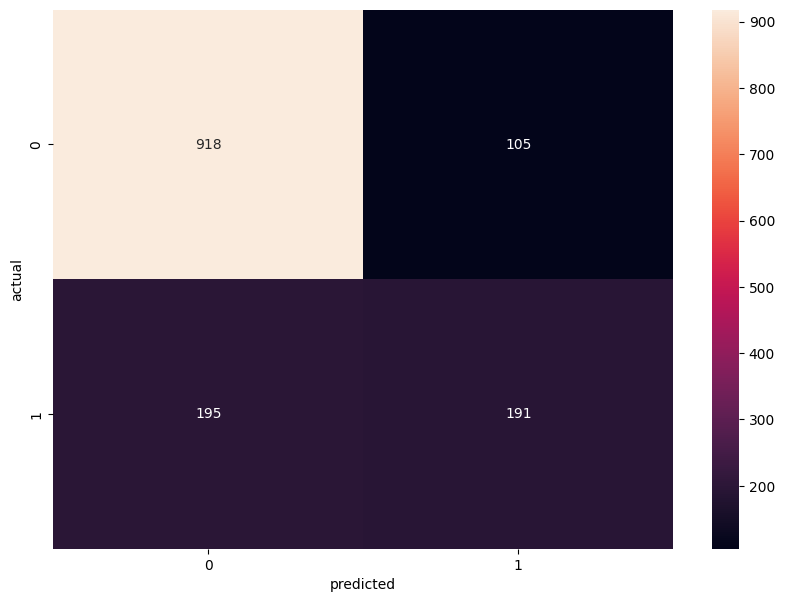

In [ ]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

**Accuracy**

In [ ]:
round((918+191)/(918+191+195+105),2)


0.79

**precission for 0 class**

In [ ]:
round(918/(918+195),2)

0.82

**precission for actually churned**

In [ ]:
round(191/(191+105),2)


0.65

**Recall for 0 class**

In [ ]:
round(918/(918+105),2)

0.9

In [ ]:
round(191/(191+195),2)

0.49